In [1]:
import numpy as np
from matplotlib import pyplot as plt, patches

plt.rcParams.update({"font.size": 24, 'figure.facecolor': 'none', 'axes.facecolor': 'white'})

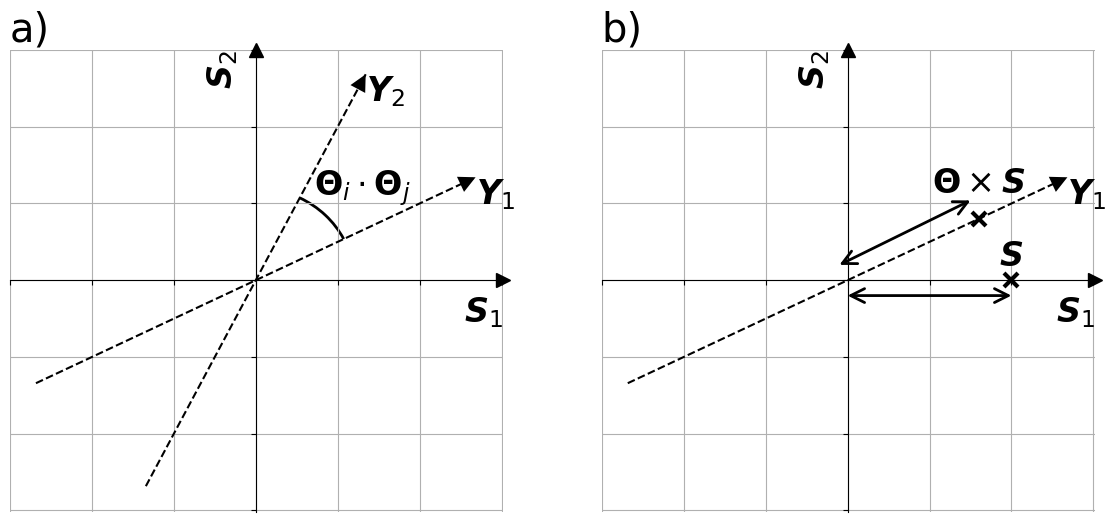

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

A = np.array([[2, 1], [1, 2]], dtype=float) # measurement matrix
A /= np.sqrt(5) # normalise

y = np.array([1, 0], dtype=float) # sparse vector
y_transform = (A @ y)[:, None] *A # transformed vector projected along A. (A @ y) can be treated as a scalar parametric value like t.

t = np.array([-1.5, 1.5]) # parametric variable

arrow1 = patches.FancyArrowPatch((A[0,0] *t[0], A[0,1] *t[0]), (A[0,0] *t[-1], A[0,1] *t[-1]),
                                 arrowstyle="-|>", linestyle="-", color="k", lw=0, mutation_scale=30, shrinkB= 0.0)
arrow2 = patches.FancyArrowPatch((A[0,0] *t[0], A[0,1] *t[0]), (A[0,0] *t[-1], A[0,1] *t[-1]), # arrow1 cannot be reused for a different axis.
                                 arrowstyle="-|>", linestyle="-", color="k", lw=0, mutation_scale=30, shrinkB= 0.0)
arrow3 = patches.FancyArrowPatch((A[1,0] *t[0], A[1,1] *t[0]), (A[1,0] *t[-1], A[1,1] *t[-1]),
                                 arrowstyle="-|>", linestyle="-", color="k", lw=0, mutation_scale=30, shrinkB= 0.0)

axs[0].plot(A[0,0] *t, A[0,1] *t, color= "k", linestyle= "--")
axs[0].plot(A[1,0] *t, A[1,1] *t, color= "k", linestyle= "--")
axs[0].add_patch(arrow2); axs[0].add_patch(arrow3)
axs[0].spines['left'].set_position('zero'); axs[0].spines['right'].set_color('none'); axs[0].spines['bottom'].set_position('zero'); axs[0].spines['top'].set_color('none')
axs[0].plot(1, 0, ">", transform=axs[0].get_yaxis_transform(), clip_on=False, color='black', markersize= 10); axs[0].plot(0, 1, "^", transform=axs[0].get_xaxis_transform(), clip_on=False, color='black', markersize= 10)
axs[0].set(xlim=(-1.5, 1.51), ylim=(-1.51, 1.5), xticklabels= [], yticklabels= [], xticks= [-1.5, -1, -0.5, 0, 0.5, 1, 1.5], yticks= [-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
axs[0].text(A[0,0] *t[-1], A[0,1] *t[-1], r"$\boldsymbol{Y}_1$", ha= "left", va= "top")
axs[0].text(A[1,0] *t[-1], A[1,1] *t[-1], r"$\boldsymbol{Y}_2$", ha= "left", va= "top")
axs[0].set_xlabel(r"$\boldsymbol{S}_1$", loc= "right")
axs[0].set_ylabel(r"$\boldsymbol{S}_2$", loc= "top")
axs[0].set_title("a)", loc= "left")
axs[0].grid()

arc = patches.Arc((0, 0), 1.2, 1.2, theta1= np.degrees(np.arctan(A[0,1]/A[0,0])), theta2= np.degrees(np.arctan(A[1,1]/A[1,0])),
                  color= "k", linewidth= 2)
axs[0].add_patch(arc)
axs[0].text(0.65, 0.6, r"$\boldsymbol{\Theta}_i \cdot \boldsymbol{\Theta}_j$", ha="center", va="center", color= "k")


axs[1].plot(A[0,0] *t, A[0,1] *t, color= "k", linestyle= "--") # y1 axis
axs[1].add_patch(arrow1)
axs[1].text(A[0,0] *t[-1], A[0,1] *t[-1], r"$\boldsymbol{Y}_1$", ha= "left", va= "top")

axs[1].plot(y[0], y[1], color= "k", marker= "x", linestyle= "None", markersize= 10, markeredgewidth= 3, markerfacecolor= "none", markeredgecolor= "k") # S before transformation
axs[1].text(y[0], y[1] +0.05, r"$\boldsymbol{S}$", ha= "center", va= "bottom")
axs[1].annotate("", xy= (0,0 -0.1), xytext= (y[0], y[1] -0.1), arrowprops= {"arrowstyle": "<->", "shrinkA": 0, "shrinkB": 0, "linewidth": 2, "mutation_scale": 25})

axs[1].plot(y_transform[0,0], y_transform[0,1], marker= "x", linestyle= "None", markersize= 10, markeredgewidth= 3, markerfacecolor= "none", markeredgecolor= "k") # S after transformation
axs[1].text(y_transform[0,0], y_transform[0,1] +0.12, r"$\boldsymbol{\Theta} \times \boldsymbol{S}$", ha= "center", va= "bottom")
axs[1].annotate("", xy= (0 -0.05,0 +0.1), xytext= (y_transform[0,0] -0.05, y_transform[0,1] +0.12), arrowprops= {"arrowstyle": "<->", "shrinkA": 0, "shrinkB": 0, "linewidth": 2, "mutation_scale": 25})

axs[1].spines['left'].set_position('zero'); axs[1].spines['right'].set_color('none'); axs[1].spines['bottom'].set_position('zero'); axs[1].spines['top'].set_color('none')
axs[1].plot(1, 0, ">", transform=axs[1].get_yaxis_transform(), clip_on=False, color='black', markersize= 10); axs[1].plot(0, 1, "^", transform=axs[1].get_xaxis_transform(), clip_on=False, color='black', markersize= 10)
axs[1].set(xlim=(-1.5, 1.51), ylim=(-1.51, 1.5), xticklabels= [], yticklabels= [], xticks= [-1.5, -1, -0.5, 0, 0.5, 1, 1.5], yticks= [-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
axs[1].set_xlabel(r"$\boldsymbol{S}_1$", loc= "right")
axs[1].set_ylabel(r"$\boldsymbol{S}_2$", loc= "top")
axs[1].set_title("b)", loc= "left")
axs[1].grid()

plt.show()

In [3]:
y_transform

array([[0.8, 0.4],
       [0.2, 0.4]])

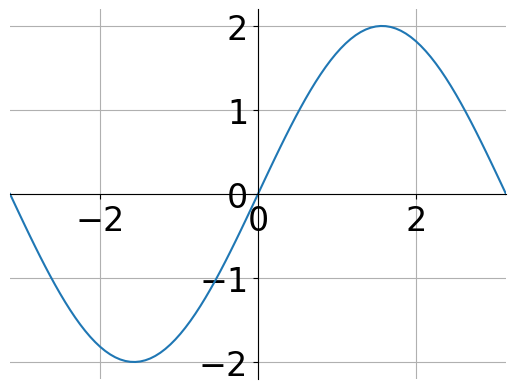

In [4]:
# Example from https://en.moonbooks.org/Articles/How-to-put-the-origin-in-the-center-of-the-figure-with-matplotlib-/

import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()

x = np.linspace(-np.pi, np.pi, 100)
y = 2*np.sin(x)

ax = plt.gca()

ax.plot(x, y)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.xlim(-np.pi,np.pi)

plt.savefig("CenterOriginMatplotlib01.png")
plt.show()